<p style="font-size:40px; font-weight:bold;"> Estadística inferencial con Python </p>

In [1]:
import pandas as pd
import numpy as np

import scipy.stats
import statsmodels.api as sm

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(rc={'figure.figsize':[12,8]})

# Selección de las pruebas estadísticas

## Factores a tener en cuenta

- Tipo de variables (numéricas, categóricas)
- Propiedades de las variables numéricas (normalidad, heterocedasticidad)
- Estructura de las variables categóricas (número de niveles)

### Evaluación de la normalidad

- Métodos visuales
    + Histogramas
    + Gráficos Q-Q (cuantil-cuantil) _Q-Q plots_
- Estadísticos de forma
    + Asimetría (_skewness_)
    + Apuntamiento (_kurtosis_)
- Pruebas de normalidad
    + Prueba de Shapiro-Wilk
    + Prueba $K^2$ de D'Agostino

In [2]:
x = np.random.normal(loc = 0, scale = 1, size = 5000)

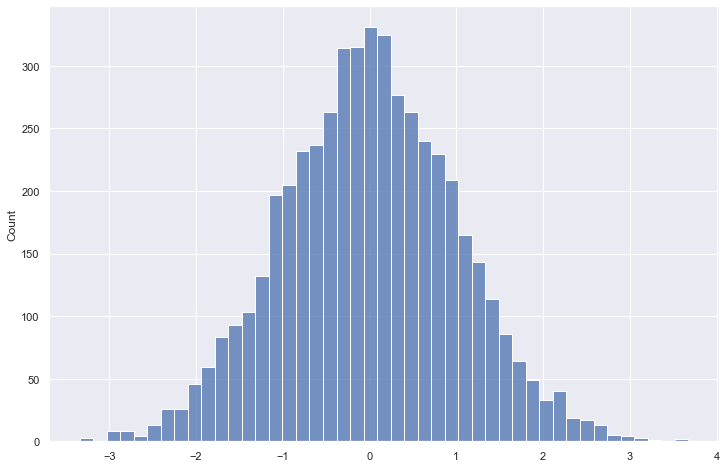

In [3]:
sns.histplot(x)
plt.show()

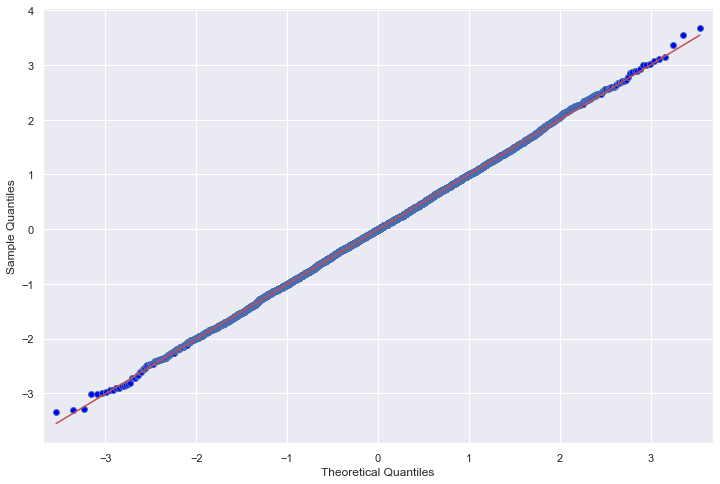

In [4]:
sm.qqplot(x, line="s")
plt.show()

In [5]:
scipy.stats.skew(x)

0.02552961690738256

In [6]:
scipy.stats.kurtosis(x)

0.012758108129330203

In [7]:
scipy.stats.shapiro(x)

ShapiroResult(statistic=0.9997131824493408, pvalue=0.7459413409233093)

In [8]:
scipy.stats.mstats.normaltest(x)

NormaltestResult(statistic=0.5998708745728387, pvalue=0.7408660514603409)

### Evaluación de la heterocedasticidad

- Prueba de Barlett
- Prueba de Levene

In [9]:
a = np.random.normal(loc=0, scale=1, size=5000)
b = np.random.normal(loc=0, scale=1, size=5000)

In [10]:
np.var(a)

1.0215092016352698

In [11]:
np.var(b)

1.0014546916323728

In [12]:
scipy.stats.bartlett(a, b)

BartlettResult(statistic=0.4912571560859434, pvalue=0.4833670512656383)

In [13]:
scipy.stats.levene(a, b)

LeveneResult(statistic=0.680486996386531, pvalue=0.4094387596439366)

In [14]:
c = np.random.normal(loc=0, scale=0.5, size=5000)
d = np.random.normal(loc=0, scale=0.75, size=5000)

In [15]:
np.var(c)

0.24134990423202562

In [16]:
np.var(d)

0.5710143982238226

In [17]:
scipy.stats.bartlett(c, d)

BartlettResult(statistic=899.4362182653814, pvalue=1.3013081515585374e-197)

In [18]:
scipy.stats.levene(c, d)

LeveneResult(statistic=756.2857753119208, pvalue=1.4699900179172404e-160)

## Tipos de pruebas estadísticas

Si las variables numéricas cumplen con las condiciones de normalidad y homocedasticidad:

- Pruebas paramétricas

Si no cumplen:

- Pruebas no paramétricas

## Comparaciones a considerar

- 2 variables numéricas
- 1 variable numérica y 1 variable categórica
    + Variable numérica no pareada
        - Variable categóricas con 2 niveles
        - Variable categórica con más de 2 niveles
    + Variable numérica pareada
        - Variable categóricas con 2 niveles
        - Variable categórica con más de 2 niveles
- 2 variables categóricas
    + Variables no pareadas
    + Variables pareadas

# 2 variables numéricas

In [19]:
df = sns.load_dataset("tips")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Gráficos de dispersión

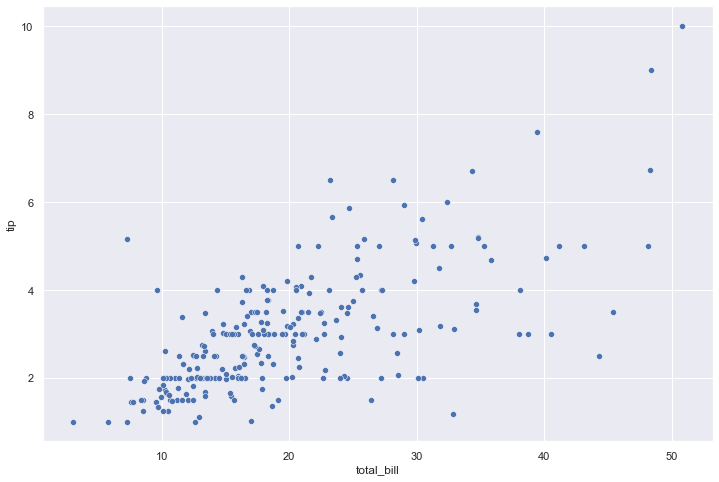

In [20]:
sns.scatterplot(x = "total_bill", y = "tip", data = df)
plt.show()

## Evaluación de la normalidad

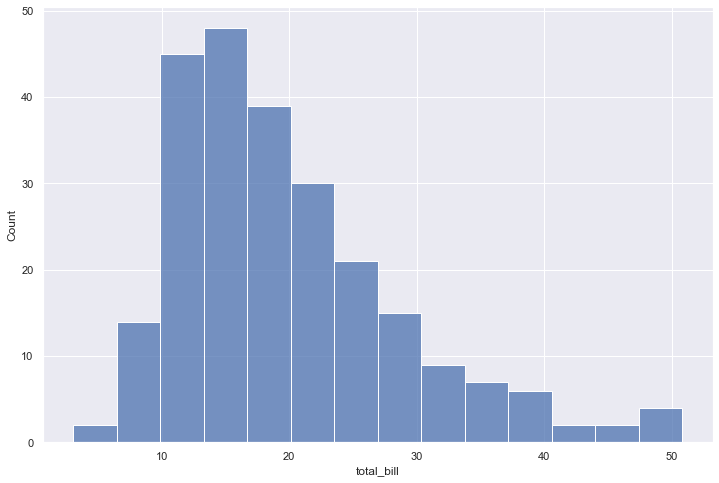

In [21]:
sns.histplot(x = "total_bill", data = df)
plt.show()

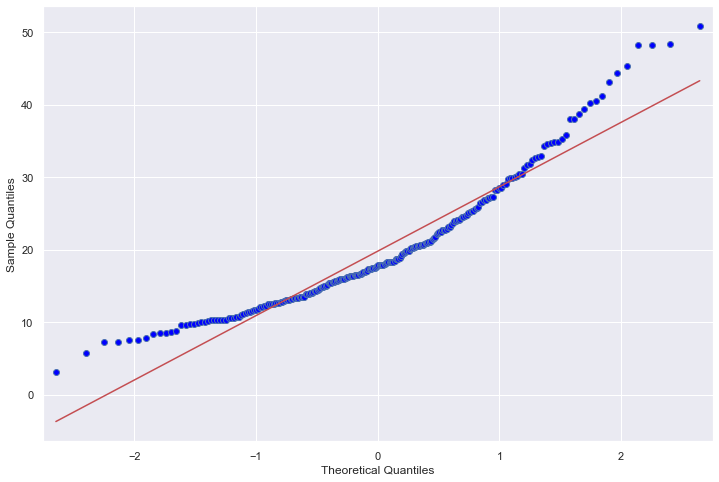

In [22]:
sm.qqplot(df['total_bill'], line='s')
plt.show()

In [23]:
scipy.stats.shapiro(df['total_bill'])

ShapiroResult(statistic=0.9197188019752502, pvalue=3.3245434183371003e-10)

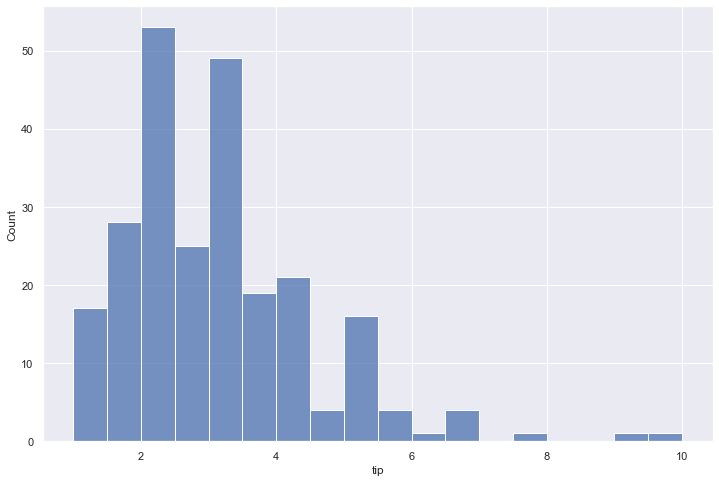

In [24]:
sns.histplot(x = "tip", data = df)
plt.show()

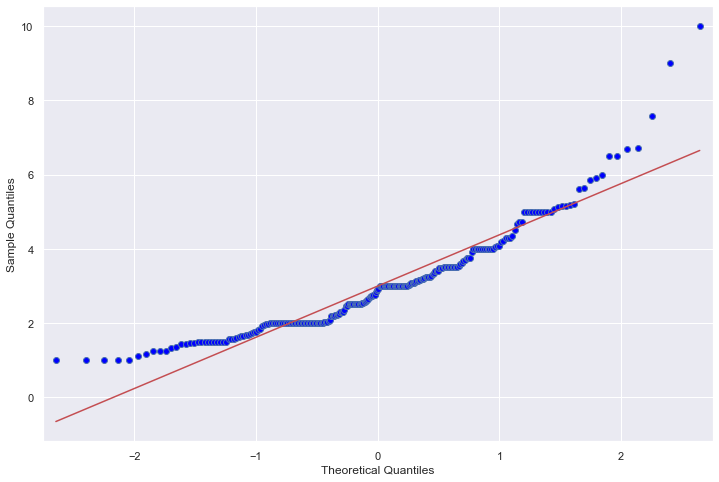

In [25]:
sm.qqplot(df['tip'], line='s')
plt.show()

In [26]:
scipy.stats.shapiro(df['tip'])

ShapiroResult(statistic=0.897811233997345, pvalue=8.20057563521992e-12)

## Prueba paramétrica: Correlación de Pearson

In [27]:
scipy.stats.pearsonr(df['total_bill'], df['tip'])

(0.6757341092113645, 6.692470646863477e-34)

## Prueba no paramétrica: Correlación de Spearman

In [28]:
scipy.stats.spearmanr(df['total_bill'], df['tip'])

SpearmanrResult(correlation=0.6789681219001009, pvalue=2.501158440923619e-34)

# 1 variable numérica no pareada y 1 variable categórica con 2 niveles

In [29]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Gráficos de cajas

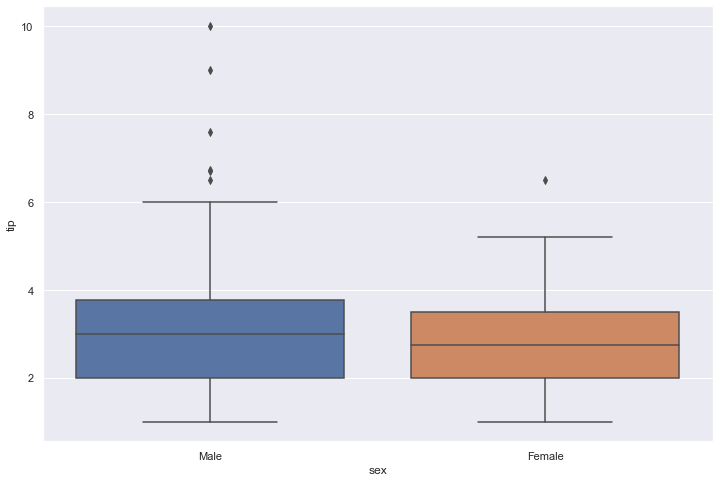

In [30]:
sns.boxplot(x = 'sex', y = 'tip', data = df)
plt.show()

## Diagramas de densidad

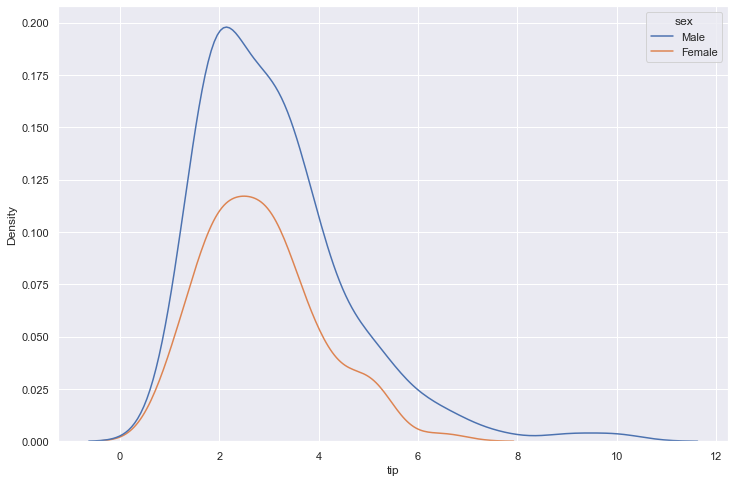

In [31]:
sns.kdeplot(x = 'tip', hue = 'sex', data = df)
plt.show()

## Cuadros de resumen

In [32]:
df.groupby('sex')['tip'].describe().transpose().round(1)

sex,Male,Female
count,157.0,87.0
mean,3.1,2.8
std,1.5,1.2
min,1.0,1.0
25%,2.0,2.0
50%,3.0,2.8
75%,3.8,3.5
max,10.0,6.5


## Evaluación de la normalidad

In [33]:
lst = [data['tip'].values for name, data in df.groupby('sex')]
print(lst)

[array([ 1.66,  3.5 ,  3.31,  4.71,  2.  ,  3.12,  1.96,  3.23,  1.71,
        1.57,  3.  ,  3.92,  3.71,  3.35,  4.08,  7.58,  3.18,  2.34,
        2.  ,  2.  ,  4.3 ,  1.45,  2.5 ,  3.27,  3.6 ,  2.  ,  2.31,
        5.  ,  2.24,  2.54,  3.06,  1.32,  5.6 ,  3.  ,  5.  ,  6.  ,
        2.05,  3.  ,  2.5 ,  1.56,  4.34,  3.51,  3.  ,  1.76,  6.73,
        3.21,  2.  ,  1.98,  3.76,  2.64,  3.15,  2.01,  2.09,  1.97,
        1.25,  3.08,  4.  ,  3.  ,  2.71,  3.  ,  3.4 ,  5.  ,  2.03,
        2.  ,  4.  ,  5.85,  3.  ,  3.  ,  3.5 ,  4.73,  4.  ,  1.5 ,
        3.  ,  1.5 ,  1.64,  4.06,  4.29,  3.76,  3.  ,  4.  ,  2.55,
        5.07,  2.31,  2.5 ,  2.  ,  1.48,  2.18,  1.5 ,  2.  ,  6.7 ,
        5.  ,  1.73,  2.  ,  2.5 ,  2.  ,  2.74,  2.  ,  2.  ,  5.  ,
        2.  ,  3.5 ,  2.5 ,  2.  ,  3.48,  2.24,  4.5 , 10.  ,  3.16,
        5.15,  3.18,  4.  ,  3.11,  2.  ,  2.  ,  3.55,  3.68,  5.65,
        3.5 ,  6.5 ,  3.  ,  5.  ,  2.  ,  4.  ,  1.5 ,  2.56,  2.02,
        4.  ,  1.44

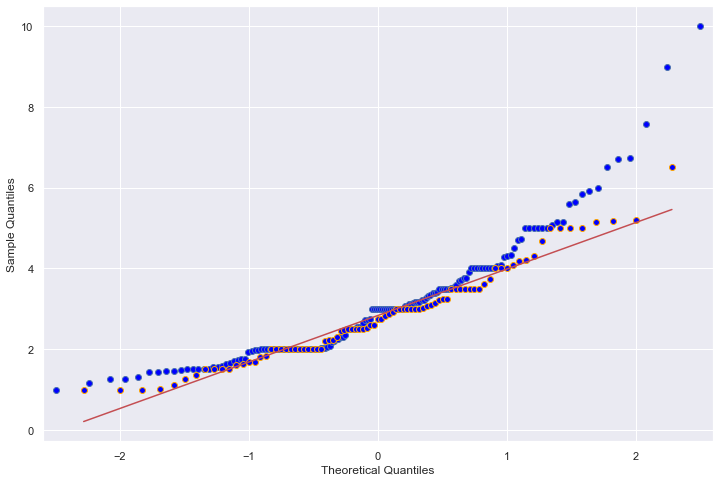

In [34]:
fig, ax = plt.subplots(nrows = 1)
sm.qqplot(lst[0], ax=ax)
sm.qqplot(lst[1], line='s', color='orange', ax=ax)
plt.show()

In [35]:
scipy.stats.shapiro(lst[0])

ShapiroResult(statistic=0.8758689165115356, pvalue=3.708431339788376e-10)

In [36]:
scipy.stats.shapiro(lst[1])

ShapiroResult(statistic=0.9567776918411255, pvalue=0.005448382347822189)

## Evaluación de la varianza

In [37]:
[np.var(x) for x in lst]

[2.203300490892125, 1.3289743162901309]

In [38]:
scipy.stats.bartlett(*lst)

BartlettResult(statistic=6.528597066853612, pvalue=0.010615365104446859)

In [39]:
scipy.stats.levene(*lst)

LeveneResult(statistic=1.9909710178779405, pvalue=0.1595236359896614)

## Prueba paramétrica: t de Student para muestras no pareadas

In [40]:
scipy.stats.ttest_ind(*lst, equal_var = True)

Ttest_indResult(statistic=1.3878597054212687, pvalue=0.16645623503456763)

In [41]:
scipy.stats.ttest_ind(*lst, equal_var = False)

Ttest_indResult(statistic=1.489536377092501, pvalue=0.13780683808650296)

## Prueba no paramétrica: U de Mann-Whitney

In [42]:
scipy.stats.mannwhitneyu(*lst)

MannwhitneyuResult(statistic=6369.5, pvalue=0.19167724679681963)

# 1 variable numérica pareada y 1 variable categórica con 2 niveles

<a href="https://www.sheffield.ac.uk/mash/statistics/datasets" target="blank">Cholesterol dataset</a>

In [43]:
df = pd.read_csv('Cholesterol_R.csv')
df = df.loc[:,['Before','After4weeks']]
df.head()

,Before,After4weeks
0,6.42,5.83
1,6.76,6.20
2,6.56,5.83
3,4.80,4.27
4,8.43,7.71


## Gráficos de cajas

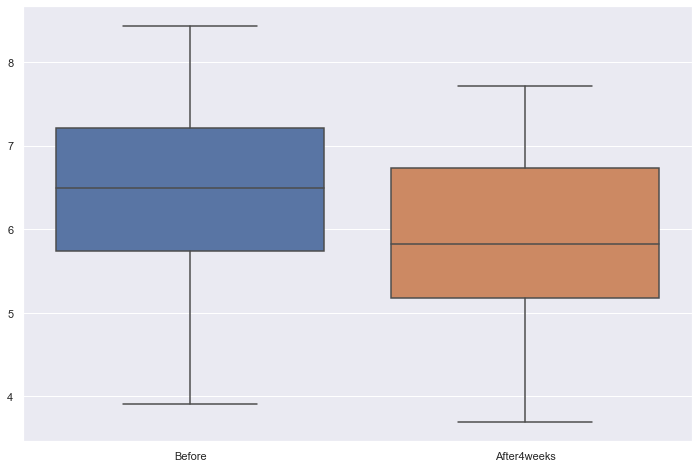

In [44]:
sns.boxplot(data=df)
plt.show()

## Diagramas de densidad

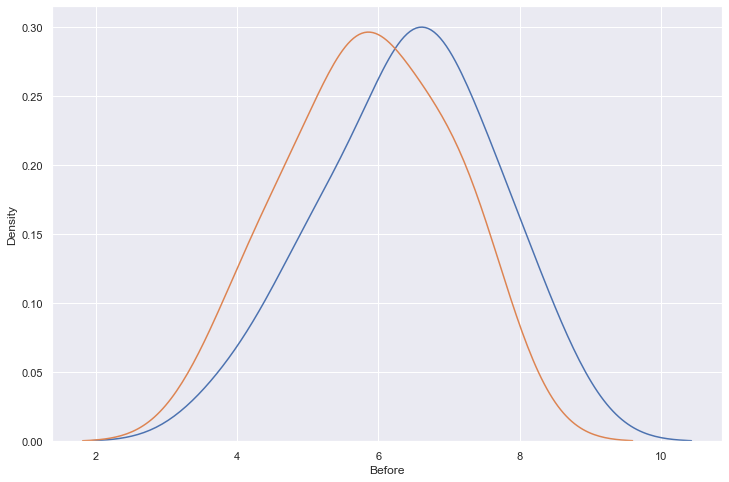

In [45]:
for x, y in df.iteritems():
    sns.kdeplot(y)

## Cuadros de resumen

In [46]:
df.describe().round(2)

,Before,After4weeks
count,18.00,18.00
mean,6.41,5.84
std,1.19,1.12
min,3.91,3.70
25%,5.74,5.18
50%,6.50,5.83
75%,7.22,6.73
max,8.43,7.71


## Evaluación de la normalidad

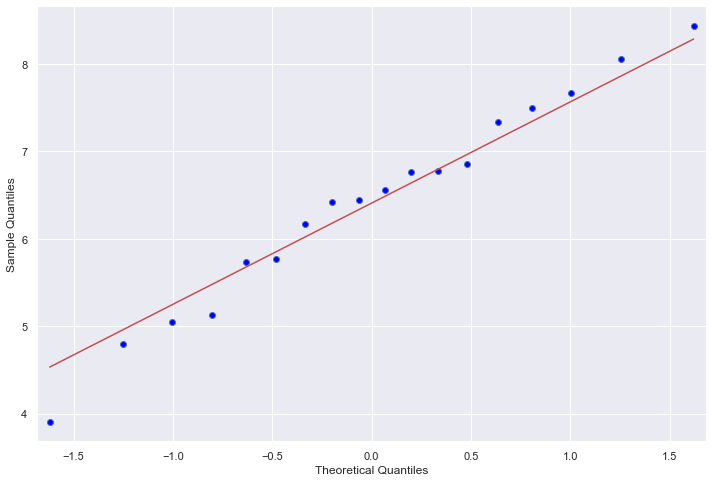

In [47]:
sm.qqplot(df['Before'], line='s')
plt.show()

In [48]:
scipy.stats.shapiro(df['Before'])

ShapiroResult(statistic=0.9819002747535706, pvalue=0.9674673676490784)

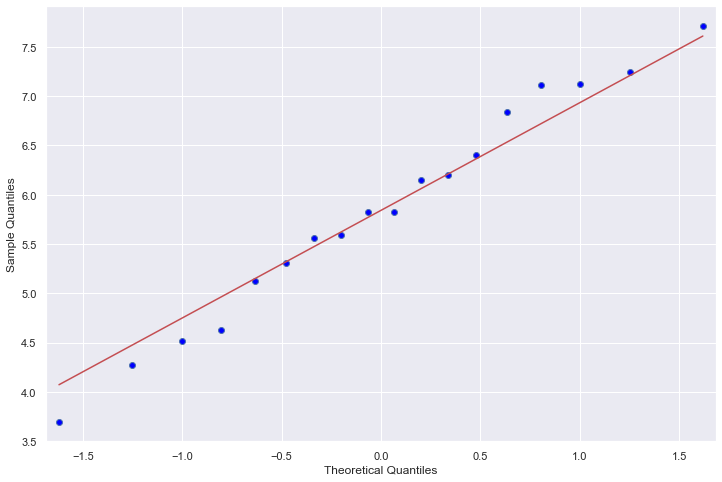

In [49]:
sm.qqplot(df['After4weeks'], line='s')
plt.show()

In [50]:
scipy.stats.shapiro(df['After4weeks'])

ShapiroResult(statistic=0.9768680930137634, pvalue=0.9120969176292419)

## Evaluación de la varianza

In [51]:
np.var(df['Before'])

1.339872839506173

In [52]:
np.var(df['After4weeks'])

1.191813888888889

In [53]:
scipy.stats.bartlett(df['Before'], df['After4weeks'])

BartlettResult(statistic=0.05657869707022211, pvalue=0.8119875325202426)

In [54]:
scipy.stats.levene(df['Before'], df['After4weeks'])

LeveneResult(statistic=0.01074370589322989, pvalue=0.9180546388972243)

## Prueba paramétrica: t de Student para muestras pareadas

In [55]:
scipy.stats.ttest_rel(df['Before'], df['After4weeks'])

Ttest_relResult(statistic=15.438872730914381, pvalue=1.9575345773928476e-11)

## Prueba no paramétrica: Prueba de rangos de Wilcoxon

In [56]:
scipy.stats.wilcoxon(df['Before'], df['After4weeks'])

WilcoxonResult(statistic=0.0, pvalue=7.62939453125e-06)

# 1 variable numérica no pareada y 1 variable categórica con más de 2 niveles

In [57]:
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Gráficos de cajas

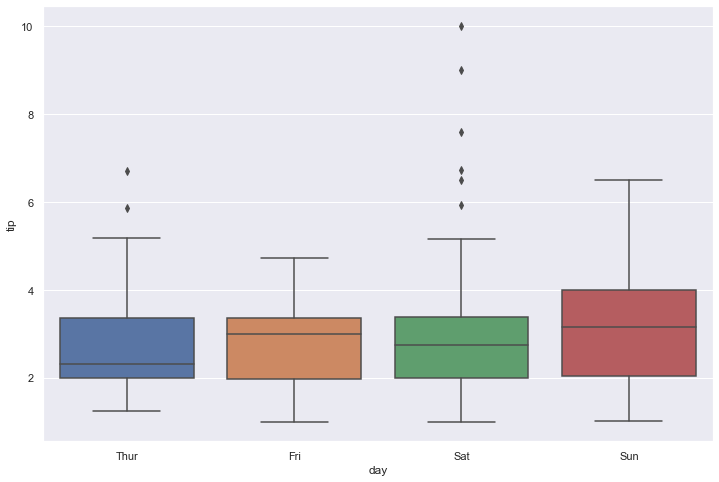

In [58]:
sns.boxplot(x='day', y='tip', data=df)
plt.show()

## Diagramas de densidad

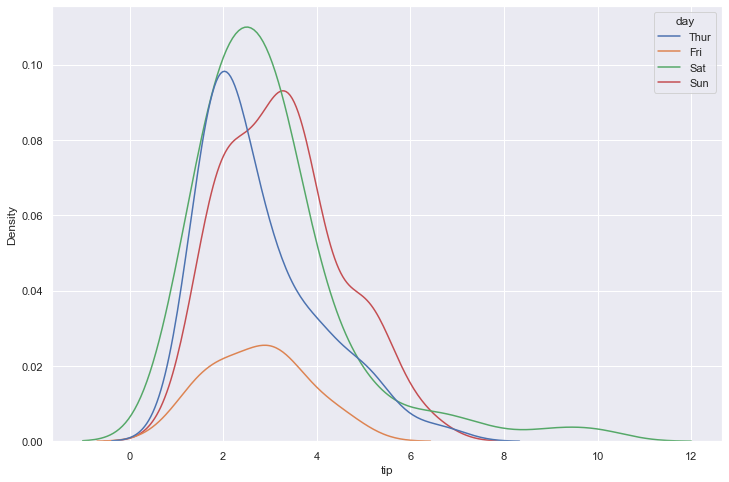

In [59]:
sns.kdeplot(x='tip', hue='day', data=df)
plt.show()

## Cuadros de resumen

In [60]:
df.groupby('day')['tip'].describe().round(2).transpose()

day,Thur,Fri,Sat,Sun
count,62.00,19.00,87.00,76.00
mean,2.77,2.73,2.99,3.26
std,1.24,1.02,1.63,1.23
min,1.25,1.00,1.00,1.01
25%,2.00,1.96,2.00,2.04
50%,2.30,3.00,2.75,3.15
75%,3.36,3.36,3.37,4.00
max,6.70,4.73,10.00,6.50


## Evaluación de la normalidad

In [61]:
lst = [data['tip'].values for name, data in df.groupby('day')]
print(lst)

[array([4.  , 3.  , 2.71, 3.  , 3.4 , 1.83, 5.  , 2.03, 5.17, 2.  , 4.  ,
       5.85, 3.  , 1.5 , 1.8 , 2.92, 2.31, 1.68, 2.5 , 2.  , 2.52, 4.2 ,
       1.48, 2.  , 2.  , 2.18, 1.5 , 2.83, 1.5 , 2.  , 3.25, 1.25, 2.  ,
       2.  , 2.  , 2.75, 3.5 , 6.7 , 5.  , 5.  , 2.3 , 1.5 , 1.36, 1.63,
       1.73, 2.  , 4.19, 2.56, 2.02, 4.  , 1.44, 2.  , 5.  , 2.  , 2.  ,
       4.  , 2.01, 2.  , 2.5 , 4.  , 3.23, 3.  ]), array([3.  , 3.5 , 1.  , 4.3 , 3.25, 4.73, 4.  , 1.5 , 3.  , 1.5 , 2.5 ,
       3.  , 2.2 , 3.48, 1.92, 3.  , 1.58, 2.5 , 2.  ]), array([ 3.35,  4.08,  2.75,  2.23,  7.58,  3.18,  2.34,  2.  ,  2.  ,
        4.3 ,  3.  ,  1.45,  2.5 ,  3.  ,  2.45,  3.27,  3.6 ,  2.  ,
        3.07,  2.31,  5.  ,  2.24,  3.  ,  1.5 ,  1.76,  6.73,  3.21,
        2.  ,  1.98,  3.76,  2.64,  3.15,  2.47,  1.  ,  2.01,  2.09,
        1.97,  3.  ,  3.14,  5.  ,  2.2 ,  1.25,  3.08,  2.5 ,  3.48,
        4.08,  1.64,  4.06,  4.29,  3.76,  4.  ,  3.  ,  1.  ,  1.61,
        2.  , 10.  ,  3.16,  3.41

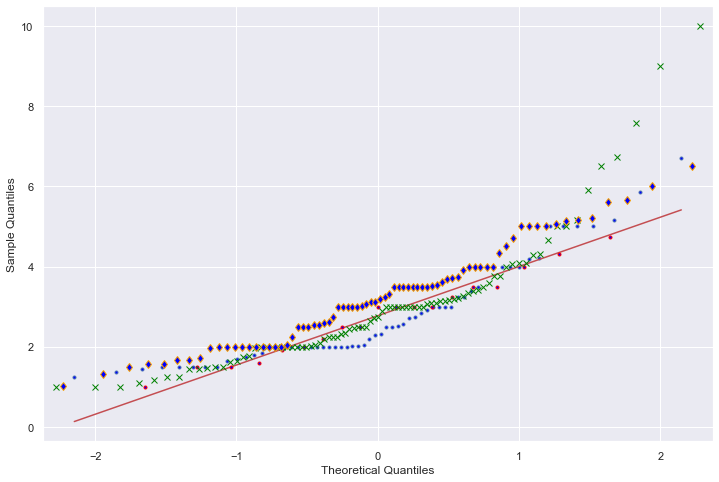

In [62]:
fig, ax = plt.subplots(nrows=1)
sm.qqplot(lst[0], line='s', marker='.', ax=ax)
sm.qqplot(lst[1], color='red', marker='.', ax=ax)
sm.qqplot(lst[2], color='green', marker='x', ax=ax)
sm.qqplot(lst[3], color='orange', marker='d', ax=ax)
plt.show()

In [63]:
[scipy.stats.shapiro(x) for x in lst]

[ShapiroResult(statistic=0.8752100467681885, pvalue=1.3876287994207814e-05),
 ShapiroResult(statistic=0.9738362431526184, pvalue=0.8496943116188049),
 ShapiroResult(statistic=0.8243008852005005, pvalue=8.842056864466485e-09),
 ShapiroResult(statistic=0.9631156325340271, pvalue=0.026331203058362007)]

## Evaluación de la varianza

In [64]:
[np.var(x) for x in lst]

[1.5133446670135278, 0.9848249307479223, 2.629630598493857, 1.504864456371191]

In [65]:
scipy.stats.bartlett(*lst)

BartlettResult(statistic=11.014055026535216, pvalue=0.011650116997675469)

In [66]:
scipy.stats.levene(*lst)

LeveneResult(statistic=0.5519761112415968, pvalue=0.6472822314837223)

## Prueba paramétrica: ANOVA de 1 vía

In [67]:
scipy.stats.f_oneway(*lst)

F_onewayResult(statistic=1.6723551980998699, pvalue=0.1735885553040592)

## Prueba no paramétrica: Prueba de Kruskal-Wallis

In [68]:
scipy.stats.kruskal(*lst)

KruskalResult(statistic=8.565587588927167, pvalue=0.03566056019447427)

# 1 variable numérica pareada y 1 variable categórica con más de 2 niveles

In [69]:
df = pd.read_csv('Cholesterol_R.csv')
df = df.loc[:,['Before','After4weeks','After8weeks']]
df.head()

,Before,After4weeks,After8weeks
0,6.42,5.83,5.75
1,6.76,6.20,6.13
2,6.56,5.83,5.71
3,4.80,4.27,4.15
4,8.43,7.71,7.67


## Gráficos de cajas

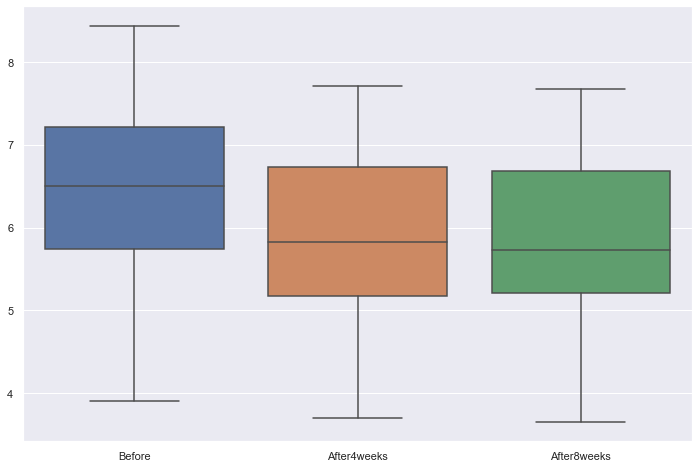

In [70]:
sns.boxplot(data=df)
plt.show()

## Diagramas de densidad

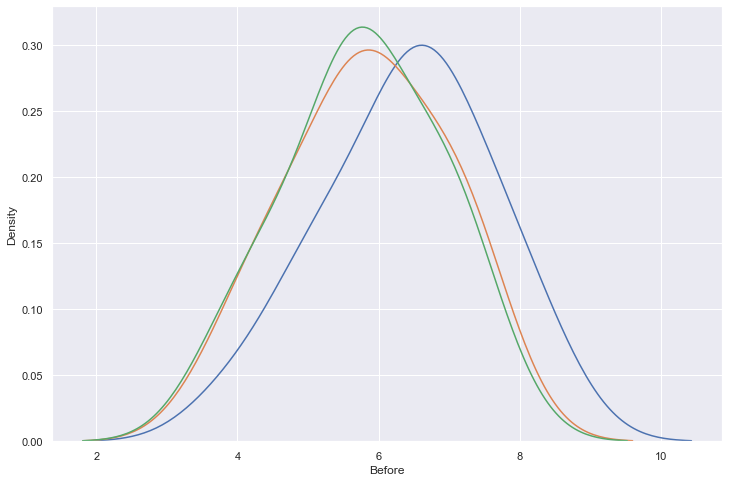

In [71]:
for x, y in df.iteritems():
    sns.kdeplot(y)

## Cuadros de resumen

In [72]:
df.describe().round(2)

,Before,After4weeks,After8weeks
count,18.00,18.00,18.00
mean,6.41,5.84,5.78
std,1.19,1.12,1.10
min,3.91,3.70,3.66
25%,5.74,5.18,5.21
50%,6.50,5.83,5.73
75%,7.22,6.73,6.69
max,8.43,7.71,7.67


## Evaluación de la normalidad

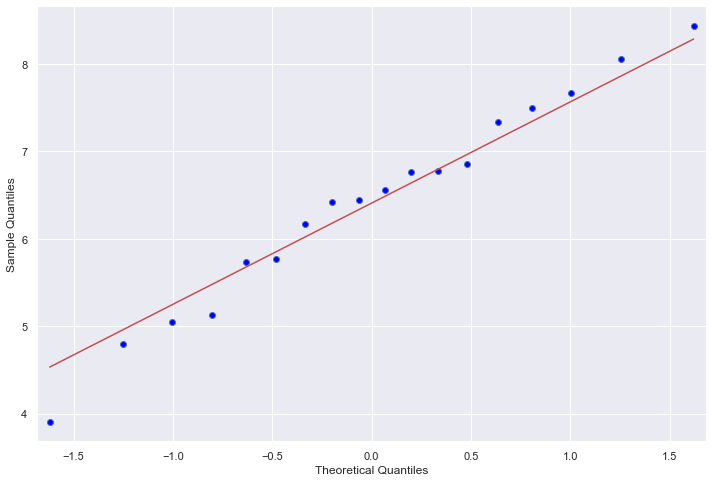

In [73]:
sm.qqplot(df['Before'], line='s')
plt.show()

In [74]:
scipy.stats.shapiro(df['Before'])

ShapiroResult(statistic=0.9819002747535706, pvalue=0.9674673676490784)

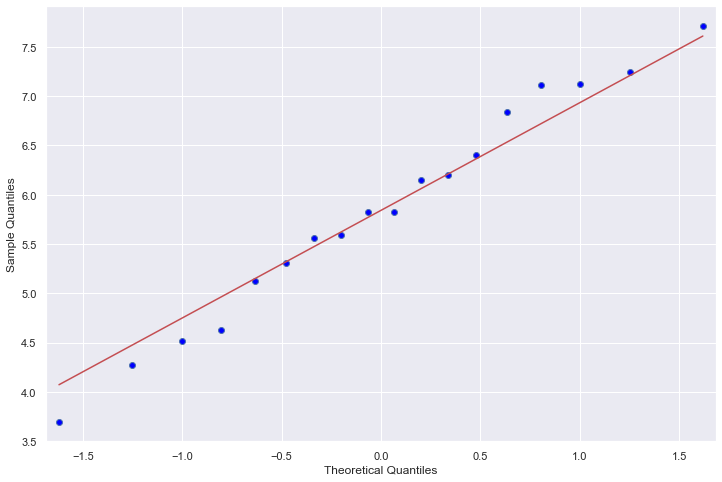

In [75]:
sm.qqplot(df['After4weeks'], line='s')
plt.show()

In [76]:
scipy.stats.shapiro(df['After4weeks'])

ShapiroResult(statistic=0.9768680930137634, pvalue=0.9120969176292419)

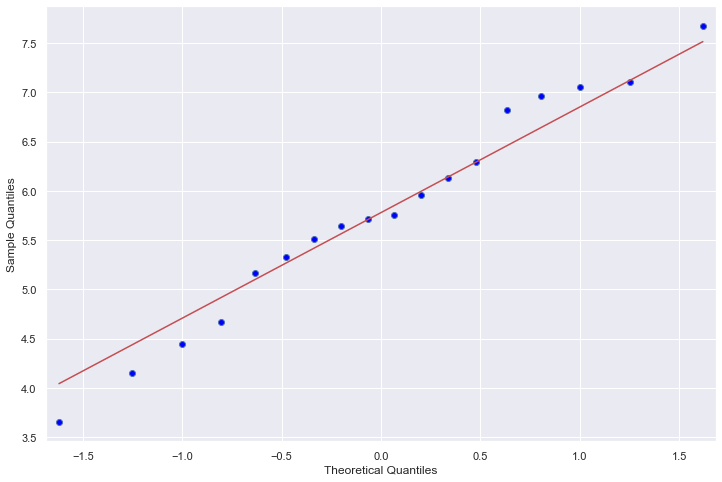

In [77]:
sm.qqplot(df['After8weeks'], line='s')
plt.show()

In [78]:
scipy.stats.shapiro(df['After8weeks'])

ShapiroResult(statistic=0.977325439453125, pvalue=0.9183036088943481)

## Evaluación de la varianza

In [79]:
np.var(df['Before'])

1.339872839506173

In [80]:
np.var(df['After4weeks'])

1.191813888888889

In [81]:
np.var(df['After8weeks'])

1.1467543209876543

In [82]:
scipy.stats.bartlett(df['Before'], df['After4weeks'], df['After8weeks'])

BartlettResult(statistic=0.1100617052972789, pvalue=0.9464559468302399)

In [83]:
scipy.stats.levene(df['Before'], df['After4weeks'], df['After8weeks'])

LeveneResult(statistic=0.03398800235873114, pvalue=0.9666049758553386)

## Prueba paramétrica: ANOVA de medidas repetidas

In [84]:
from statsmodels.stats.anova import AnovaRM

In [85]:
df['id'] = np.arange(1,19)

df_aov = df.melt(id_vars='id', value_name='Chol', var_name='Timing')

anovarm = AnovaRM(df_aov, depvar='Chol', subject='id', within=['Timing'])
res = anovarm.fit()
print(res)

                Anova
       F Value  Num DF  Den DF Pr > F
-------------------------------------
Timing 212.3206 2.0000 34.0000 0.0000



## Prueba no paramétrica: ANOVA de Friedman

In [86]:
scipy.stats.friedmanchisquare(df['Before'], df['After4weeks'], df['After8weeks'])

FriedmanchisquareResult(statistic=29.77777777777777, pvalue=3.418516763331766e-07)

# 2 variables categóricas no pareadas

In [87]:
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Cuadros de contingencia

In [88]:
pd.crosstab(df['sex'], df['smoker'], margins=True)

smoker,Yes,No,All
sex,,,
Male,60,97,157
Female,33,54,87
All,93,151,244


In [89]:
pd.crosstab(df['sex'], df['smoker'], normalize="index").round(2)

smoker,Yes,No
sex,,
Male,0.38,0.62
Female,0.38,0.62


## Gráficos de barras

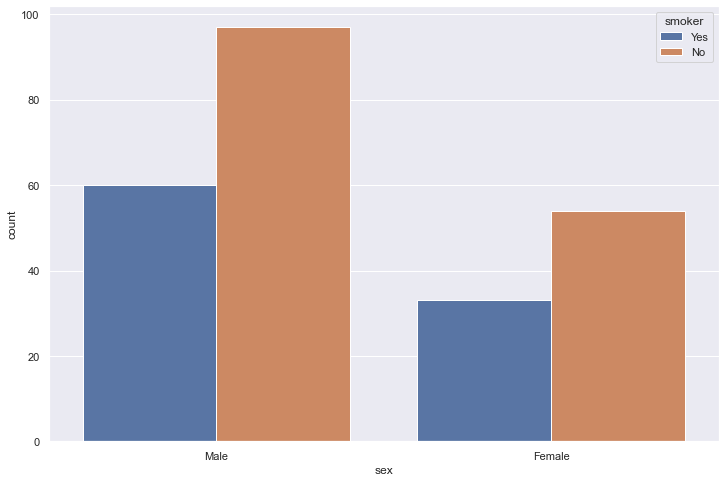

In [90]:
sns.countplot(x = "sex", hue = "smoker", data = df)
plt.show()

## Prueba del $\chi^2$

In [91]:
scipy.stats.chi2_contingency(pd.crosstab(df['sex'], df['smoker']))

(0.008763290531773594,
 0.925417020494423,
 1,
 array([[59.84016393, 97.15983607],
        [33.15983607, 53.84016393]]))

# 2 variables categóricas pareadas

<a href="https://www.sheffield.ac.uk/mash/statistics/datasets" target="blank">Smoker dataset</a>

In [92]:
df = pd.read_csv('Smoker_R.csv')
df.head()

,Before,After
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


## Cuadros de contingencia

In [93]:
pd.crosstab(df['Before'], df['After'], margins=True)

After,0,1,All
Before,,,
0,20,5,25
1,16,9,25
All,36,14,50


In [94]:
pd.crosstab(df['Before'], df['After'], normalize="all", margins=True)

After,0,1,All
Before,,,
0,0.40,0.10,0.5
1,0.32,0.18,0.5
All,0.72,0.28,1.0


## Gráficos de mosaicos

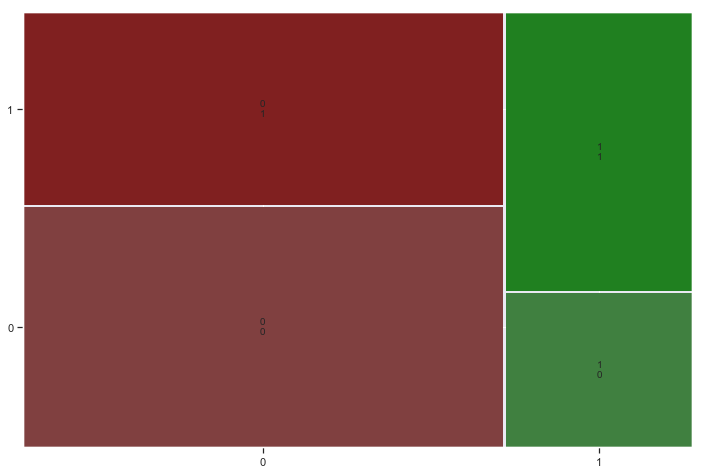

In [95]:
from statsmodels.graphics.mosaicplot import mosaic

mosaic(df, ['After', 'Before'])
plt.show()

## Prueba de McNemar

In [96]:
from statsmodels.stats.contingency_tables import mcnemar
print(mcnemar(pd.crosstab(df['Before'], df['After'])))

pvalue      0.026603698730468753
statistic   5.0
